# Spaceship Titanic Predictions

### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Exploratory data analysis
- Data Cleaning
- Data Pre-Processing
- Model Training
- Choose best model

---

## About

The **Spaceship Titanic** is a fictional interstellar voyage where an anomaly in spacetime has caused passengers to be mysteriously transported to an alternate dimension.

You are provided with personal records of the passengers, and the goal is to **predict whether each passenger was transported** based on these attributes. The data was partially recovered from the ship's damaged computer system.

This project simulates a **real-world classification problem** and is ideal for building an **end-to-end MLOps pipeline** from data ingestion to deployment.

---

## 1) Problem Statement

After the Spaceship Titanic’s collision with the anomaly, the transport records were corrupted. You are tasked with creating a machine learning model to predict whether a passenger was **Transported** to an alternate dimension.

This model can help the ship's investigation committee understand what factors contributed to the disappearance and automate future anomaly responses.

- **Objective**: Predict the `Transported` (True/False) status using passenger data.
- **Type**: Binary Classification Problem

---

## 2) Data Acquisition & Inspection

The dataset is provided in three CSV files:

- `train.csv` – Contains training data 
- `test.csv` – Used for final predictions 
- `sample_submission.csv` – Sample submission format for Kaggle

Each row represents a unique passenger with features such as:

- Personal information: `HomePlanet`, `CryoSleep`, `Cabin`, `Destination`, `Age`, `VIP`, `Name`
- Spending features: `RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, `VRDeck`
- Target column: `Transported` (only in train data)

---

### 2.1 Load Data and Libraries

**Importing Pandas, Numpy, Matplotlib, Seaborn, math**

In [403]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from scipy.stats import chi2_contingency
import math

**Import the CSV Data as Pandas DataFrame**

In [404]:
train_df = pd.read_csv('train.csv')
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [405]:
test_df = pd.read_csv('test.csv')
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


### 2.2 Shape of dataset

In [406]:
print(train_df.shape)
print(test_df.shape)

(8693, 14)
(4277, 13)


### 2.3 Summary of dataset

In [407]:
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


### 2.4 Check Datatypes in the dataset

In [408]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [409]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


### 2.5 Checking Null Values

In [410]:
# Count of missing values per column
missing_train = train_df.isnull().sum()
missing_percent = (missing_train / len(train_df)) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing_train,
    'Percent Missing': missing_percent
})
print(missing_df[missing_df['Missing Values'] > 0].sort_values(by='Percent Missing', ascending=False))


              Missing Values  Percent Missing
CryoSleep                217         2.496261
ShoppingMall             208         2.392730
VIP                      203         2.335212
HomePlanet               201         2.312205
Name                     200         2.300702
Cabin                    199         2.289198
VRDeck                   188         2.162660
FoodCourt                183         2.105142
Spa                      183         2.105142
Destination              182         2.093639
RoomService              181         2.082135
Age                      179         2.059128


In [411]:
# Count of missing values per column
missing_test = test_df.isnull().sum()
missing_percent = (missing_test / len(test_df)) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing_test,
    'Percent Missing': missing_percent
})
print(missing_df[missing_df['Missing Values'] > 0].sort_values(by='Percent Missing', ascending=False))

              Missing Values  Percent Missing
FoodCourt                106         2.478373
Spa                      101         2.361468
Cabin                    100         2.338087
ShoppingMall              98         2.291326
Name                      94         2.197802
CryoSleep                 93         2.174421
VIP                       93         2.174421
Destination               92         2.151040
Age                       91         2.127660
HomePlanet                87         2.034136
RoomService               82         1.917232
VRDeck                    80         1.870470


### 2.6 Check Unique Values

In [412]:
for col in train_df.columns:
    print(f"{col}: {train_df[col].nunique()} unique values")

PassengerId: 8693 unique values
HomePlanet: 3 unique values
CryoSleep: 2 unique values
Cabin: 6560 unique values
Destination: 3 unique values
Age: 80 unique values
VIP: 2 unique values
RoomService: 1273 unique values
FoodCourt: 1507 unique values
ShoppingMall: 1115 unique values
Spa: 1327 unique values
VRDeck: 1306 unique values
Name: 8473 unique values
Transported: 2 unique values


In [413]:
for col in test_df.columns:
    print(f"{col}: {test_df[col].nunique()} unique values")

PassengerId: 4277 unique values
HomePlanet: 3 unique values
CryoSleep: 2 unique values
Cabin: 3265 unique values
Destination: 3 unique values
Age: 79 unique values
VIP: 2 unique values
RoomService: 842 unique values
FoodCourt: 902 unique values
ShoppingMall: 715 unique values
Spa: 833 unique values
VRDeck: 796 unique values
Name: 4176 unique values


---
## 3) Exploratory Data Analysis

### 3.1 Defining Numerical and Categorical Column

In [414]:
# define numerical & categorical columns for train

train_numeric_features = train_df.select_dtypes(include=['float64', 'int64']).columns
train_categorical_features = train_df.select_dtypes(include=['object', 'category', 'bool']).columns

# print columns
print('We have {} numerical features : {}'.format(len(train_numeric_features), train_numeric_features))
print('\nWe have {} categorical features : {}'.format(len(train_categorical_features), train_categorical_features))

We have 6 numerical features : Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')

We have 8 categorical features : Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP',
       'Name', 'Transported'],
      dtype='object')


In [415]:
# define numerical & categorical columns for test

test_numeric_features = test_df.select_dtypes(include=['float64', 'int64']).columns
test_categorical_features = test_df.select_dtypes(include=['object', 'category', 'bool']).columns

# print columns
print('We have {} numerical features : {}'.format(len(test_numeric_features), test_numeric_features))
print('\nWe have {} categorical features : {}'.format(len(test_categorical_features), test_categorical_features))

We have 6 numerical features : Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')

We have 7 categorical features : Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP',
       'Name'],
      dtype='object')


### 3.2 Checking the Proprotion Count of Categorical Columns

In [416]:
# proportion of count data on categorical columns
for col in train_categorical_features:
    print(train_df[col].value_counts(normalize=True) * 100)
    print('---------------------------')

PassengerId
0001_01    0.011504
6136_01    0.011504
6141_01    0.011504
6139_06    0.011504
6139_05    0.011504
             ...   
3126_01    0.011504
3124_03    0.011504
3124_02    0.011504
3124_01    0.011504
9280_02    0.011504
Name: proportion, Length: 8693, dtype: float64
---------------------------
HomePlanet
Earth     54.192181
Europa    25.094206
Mars      20.713613
Name: proportion, dtype: float64
---------------------------
CryoSleep
False    64.16942
True     35.83058
Name: proportion, dtype: float64
---------------------------
Cabin
G/734/S     0.094184
G/109/P     0.082411
B/201/P     0.082411
G/1368/P    0.082411
G/981/S     0.082411
              ...   
G/556/P     0.011773
E/231/S     0.011773
G/545/S     0.011773
G/543/S     0.011773
F/947/P     0.011773
Name: proportion, Length: 6560, dtype: float64
---------------------------
Destination
TRAPPIST-1e      69.498296
55 Cancri e      21.149101
PSO J318.5-22     9.352603
Name: proportion, dtype: float64
----------------

In [417]:
# proportion of count data on categorical columns
for col in test_categorical_features:
    print(test_df[col].value_counts(normalize=True) * 100)
    print('---------------------------')

PassengerId
0013_01    0.023381
6288_02    0.023381
6269_01    0.023381
6269_02    0.023381
6269_03    0.023381
             ...   
3072_01    0.023381
3074_01    0.023381
3075_01    0.023381
3077_01    0.023381
9277_01    0.023381
Name: proportion, Length: 4277, dtype: float64
---------------------------
HomePlanet
Earth     54.009547
Europa    23.914081
Mars      22.076372
Name: proportion, dtype: float64
---------------------------
CryoSleep
False    63.097514
True     36.902486
Name: proportion, dtype: float64
---------------------------
Cabin
G/160/P     0.191525
D/273/S     0.167584
B/31/P      0.167584
G/748/S     0.167584
E/228/S     0.167584
              ...   
E/236/S     0.023941
F/650/S     0.023941
G/566/P     0.023941
G/557/S     0.023941
G/1498/S    0.023941
Name: proportion, Length: 3265, dtype: float64
---------------------------
Destination
TRAPPIST-1e      70.633214
55 Cancri e      20.095579
PSO J318.5-22     9.271207
Name: proportion, dtype: float64
--------------

**Insights:**

- `PassengerID`, `Cabin` and `Name` have unique vlaues for each column which can be dropped as it it of no importance
- `VIP` and `CryoSleep` seems to be an important column as most of them are not VIP and not in CryoSleep.
- `HomePlanet` and `Destination` most of the are from Earth and heading to TRAPPIST-1e
- `Cabin` Split it into Deck (letter), Cabin Number, and Side (P/S) or group rare decks.

### 3.3 Univariate Analysis of Numerical Features

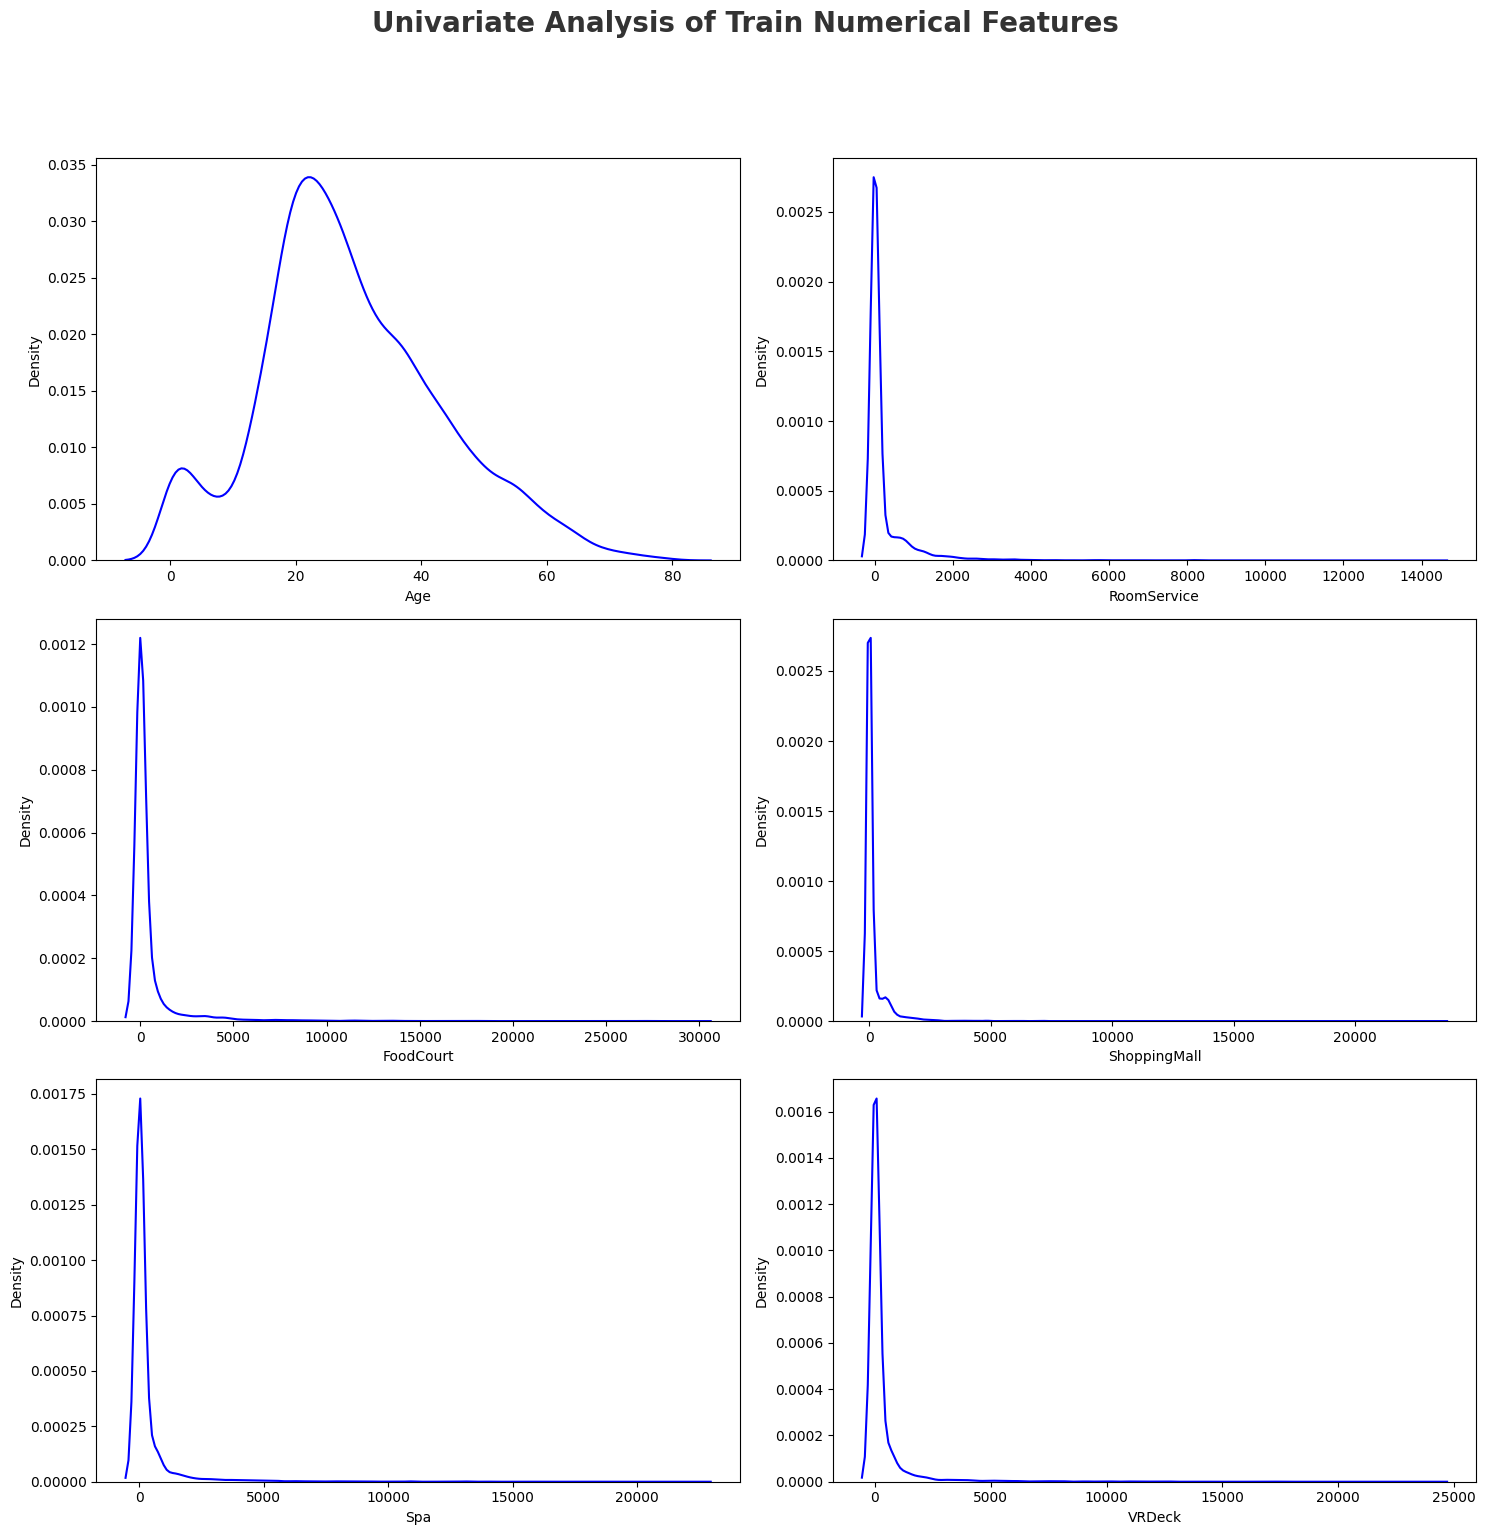

In [418]:
# Numerical features distribution
rows = math.ceil(len(train_numeric_features) / 2)
fig, axes = plt.subplots(rows, 2, figsize=(15, 5 * rows))
fig.suptitle('Univariate Analysis of Train Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.02)

# Flatten axes for easy indexing
axes = axes.flatten()

for i, feature in enumerate(train_numeric_features):
    sns.kdeplot(x=train_df[feature], ax=axes[i], color='blue')
    axes[i].set_xlabel(feature)

# Hide unused subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


**Insight: Skewness in Numerical Feature Distributions**

From the univariate analysis of numerical features, we observe distinct distribution patterns:

- **`Age`** shows a near-normal distribution, peaking around the early 20s, suggesting a concentration of younger passengers. This implies that the majority of travelers were young adults.
- **`RoomService`**, **`FoodCourt`**, **`ShoppingMall`**, **`Spa`**, and **`VRDeck`** all demonstrate **strong right skewness**:
  - Most passengers spent **little to no money** on these services.
  - A **small minority spent excessively**, stretching the distribution tails.

📌 **Implications**:
- These right-skewed features may benefit from **log transformation** during preprocessing to reduce skewness and stabilize variance.
- This distribution may indicate economic disparities or differing service preferences among passengers.



### 3.4 Univariate Analysis of Categorical Features

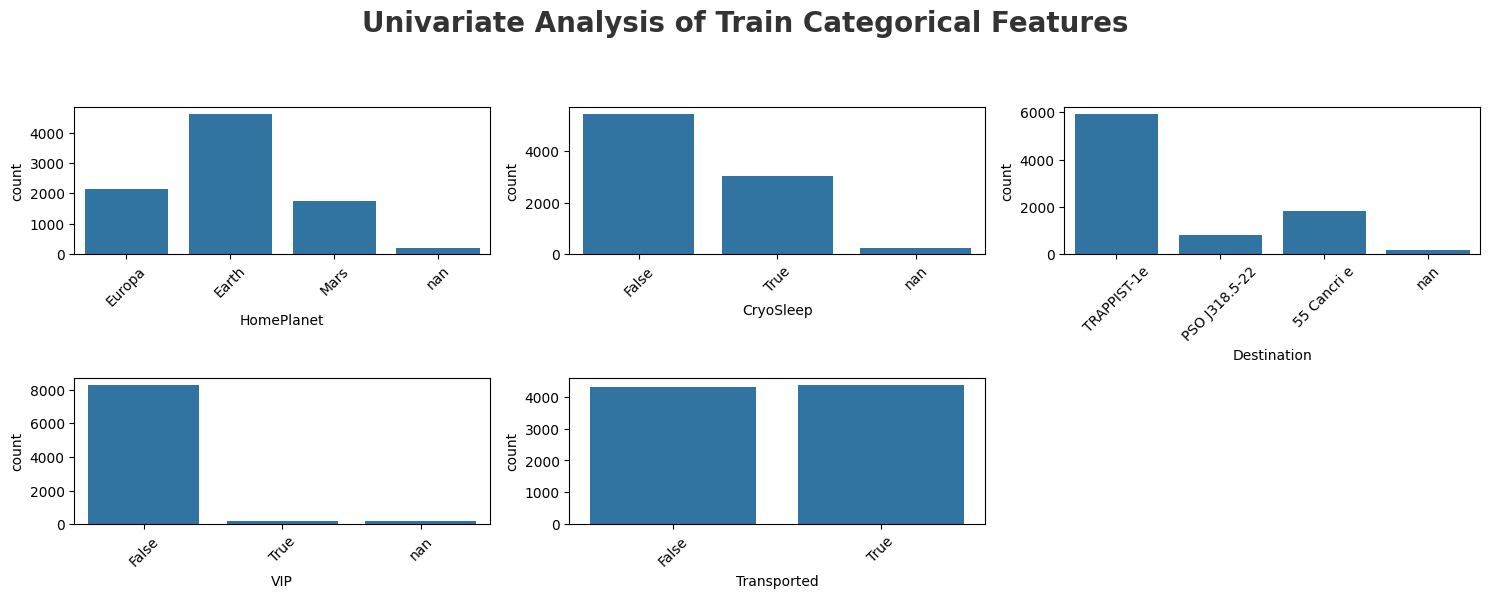

In [419]:
# Categorical features distribution
train_categorical_features = [col for col in train_categorical_features if col not in ['Cabin', 'Name','PassengerId']]

# Convert to string to avoid dtype errors in seaborn (optional but recommended)
train_df[train_categorical_features] = train_df[train_categorical_features].astype(str)

# Create the plot
plt.figure(figsize=(15, 8))
plt.suptitle('Univariate Analysis of Train Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(len(train_categorical_features)):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=train_df[train_categorical_features[i]])
    plt.xlabel(train_categorical_features[i])
    plt.xticks(rotation=45)

# Tight layout should be outside the loop
plt.tight_layout(rect=[0, 0, 1, 0.95])


**Insight: Distribution of Categorical Features**

The univariate analysis of categorical features reveals several notable patterns:

- **`HomePlanet`**:
  - Most passengers originated from **Earth**, followed by **Europa** and **Mars**.
  - This may reflect Earth being the primary hub or launch point for interstellar travel.

- **`CryoSleep`**:
  - A majority of passengers **were not in cryosleep** 

- **`Destination`**:
  - **TRAPPIST-1e** was the most common destination by far, indicating it may have been the main or default route.
  - **55 Cancri e** and **PSO J318.5-22** were far less frequent.

- **`VIP`**:
  - Very few passengers were marked as **VIP**—the vast majority were regular travelers.
  - This points to a heavily economy or standard-class population.

- **`Transported`**:
  - The **target variable** appears **evenly distributed** between `True` and `False`, showing **no significant class imbalance**. This is favorable for classification model training.

These patterns provide early clues about the demographics, service usage, and class dynamics of passengers—useful for feature engineering and downstream modeling tasks.


### 3.5 Check Multicollinearity in Numerical features

In [420]:
train_discrete_features=[feature for feature in train_numeric_features if len(test_df[feature].unique())<=25]

train_continuous_features=[feature for feature in train_numeric_features if len(test_df[feature].unique()) > 25]

print('We have {} train_discrete features : {}'.format(len(train_discrete_features), train_discrete_features))
print('\nWe have {} train_continuous_features : {}'.format(len(train_continuous_features), train_continuous_features))

We have 0 train_discrete features : []

We have 6 train_continuous_features : ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']


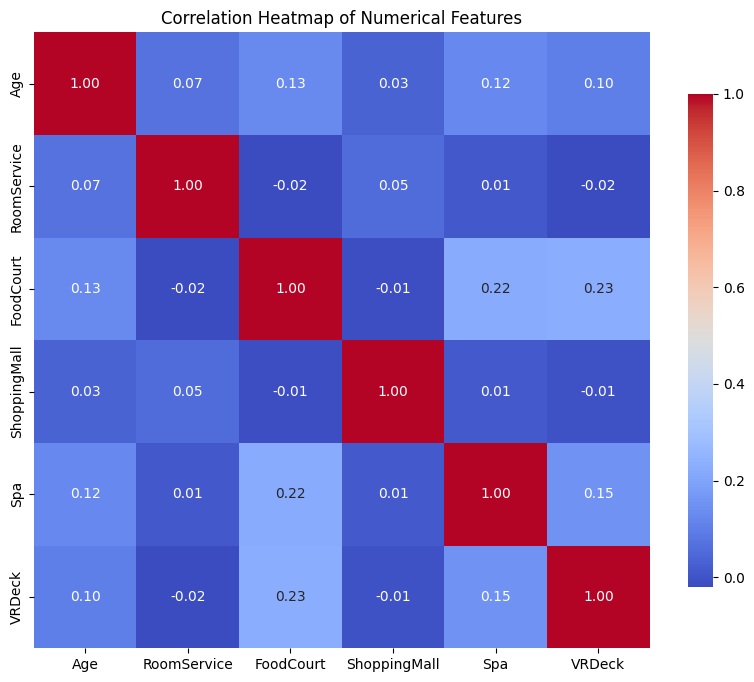

In [421]:
plt.figure(figsize=(10, 8))
corr = train_df[train_numeric_features].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={'shrink': 0.8})
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

In [422]:
# Drop rows with missing values for this step (or fill them first)
X = train_df[train_numeric_features].dropna()  # Or use fillna() if needed

# Add constant term for intercept
X_const = add_constant(X)

# Compute VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i + 1) for i in range(len(X.columns))]

print(vif_data)


        Feature       VIF
0           Age  1.038221
1   RoomService  1.008474
2     FoodCourt  1.106329
3  ShoppingMall  1.004379
4           Spa  1.072144
5        VRDeck  1.068899


**Insights:**
- All features have VIFs between `1.00` and `1.11`, all of which are below the threshold of `5`.
- `No multicollinearity` exists among the variables.


### 3.6 Check Multicollinearity for Categorical features
- A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test

- A chi-square statistic is one way to show a relationship between two categorical variables.

- Here we test correlation of Categorical columns with Target column i.e Transported

Null Hypothesis (
): The Feature is independent of target column (No-Correlation)

Alternative Hypothesis (
): The Feature and Target column are not independent (Correalted)

In [423]:
chi2_test = []
for feature in train_categorical_features:
    if chi2_contingency(pd.crosstab(train_df['Transported'], train_df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[train_categorical_features, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,HomePlanet,Reject Null Hypothesis
1,CryoSleep,Reject Null Hypothesis
2,Destination,Reject Null Hypothesis
3,VIP,Reject Null Hypothesis
4,Transported,Reject Null Hypothesis



**Insights**

- All categorical features (`HomePlanet`, `CryoSleep`, `Destination`, `VIP`) show significant association with the target variable `Transported` (p < 0.05), indicating they are likely informative for prediction.

- Further tests (e.g., Cramér's V or pairwise Chi-Square tests between features) are needed to assess multicollinearity among categorical variables.


#### 3.6.1 Cramér's V Test

In [424]:
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1)) / (n-1))  # Bias correction
    rcorr = r - ((r-1)**2) / (n-1)
    kcorr = k - ((k-1)**2) / (n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# List of categorical features to check pairwise
cat_features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

# Create empty matrix
cramer_matrix = pd.DataFrame(index=cat_features, columns=cat_features)

# Fill matrix
for col1 in cat_features:
    for col2 in cat_features:
        if col1 == col2:
            cramer_matrix.loc[col1, col2] = 1.0
        else:
            confusion_matrix = pd.crosstab(train_df[col1], train_df[col2])
            cramer_matrix.loc[col1, col2] = round(cramers_v(confusion_matrix), 3)

cramer_matrix = cramer_matrix.astype(float)
cramer_matrix

,HomePlanet,CryoSleep,Destination,VIP
HomePlanet,1.000,0.081,0.210,0.122
CryoSleep,0.081,1.000,0.084,0.055
Destination,0.210,0.084,1.000,0.028
VIP,0.122,0.055,0.028,1.000


**Insights:**
- All values are well below 0.3.
- No strong or moderate association between any pairs of categorical features.
- No multicollinearity issues among these categorical features.

In [425]:
train_continues_features=[feature for feature in train_numeric_features if len(train_df[feature].unique())>=10]
print('Num of train continues features :',train_continues_features)

Num of train continues features : ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']


### 3.7 Feature Distribution Report

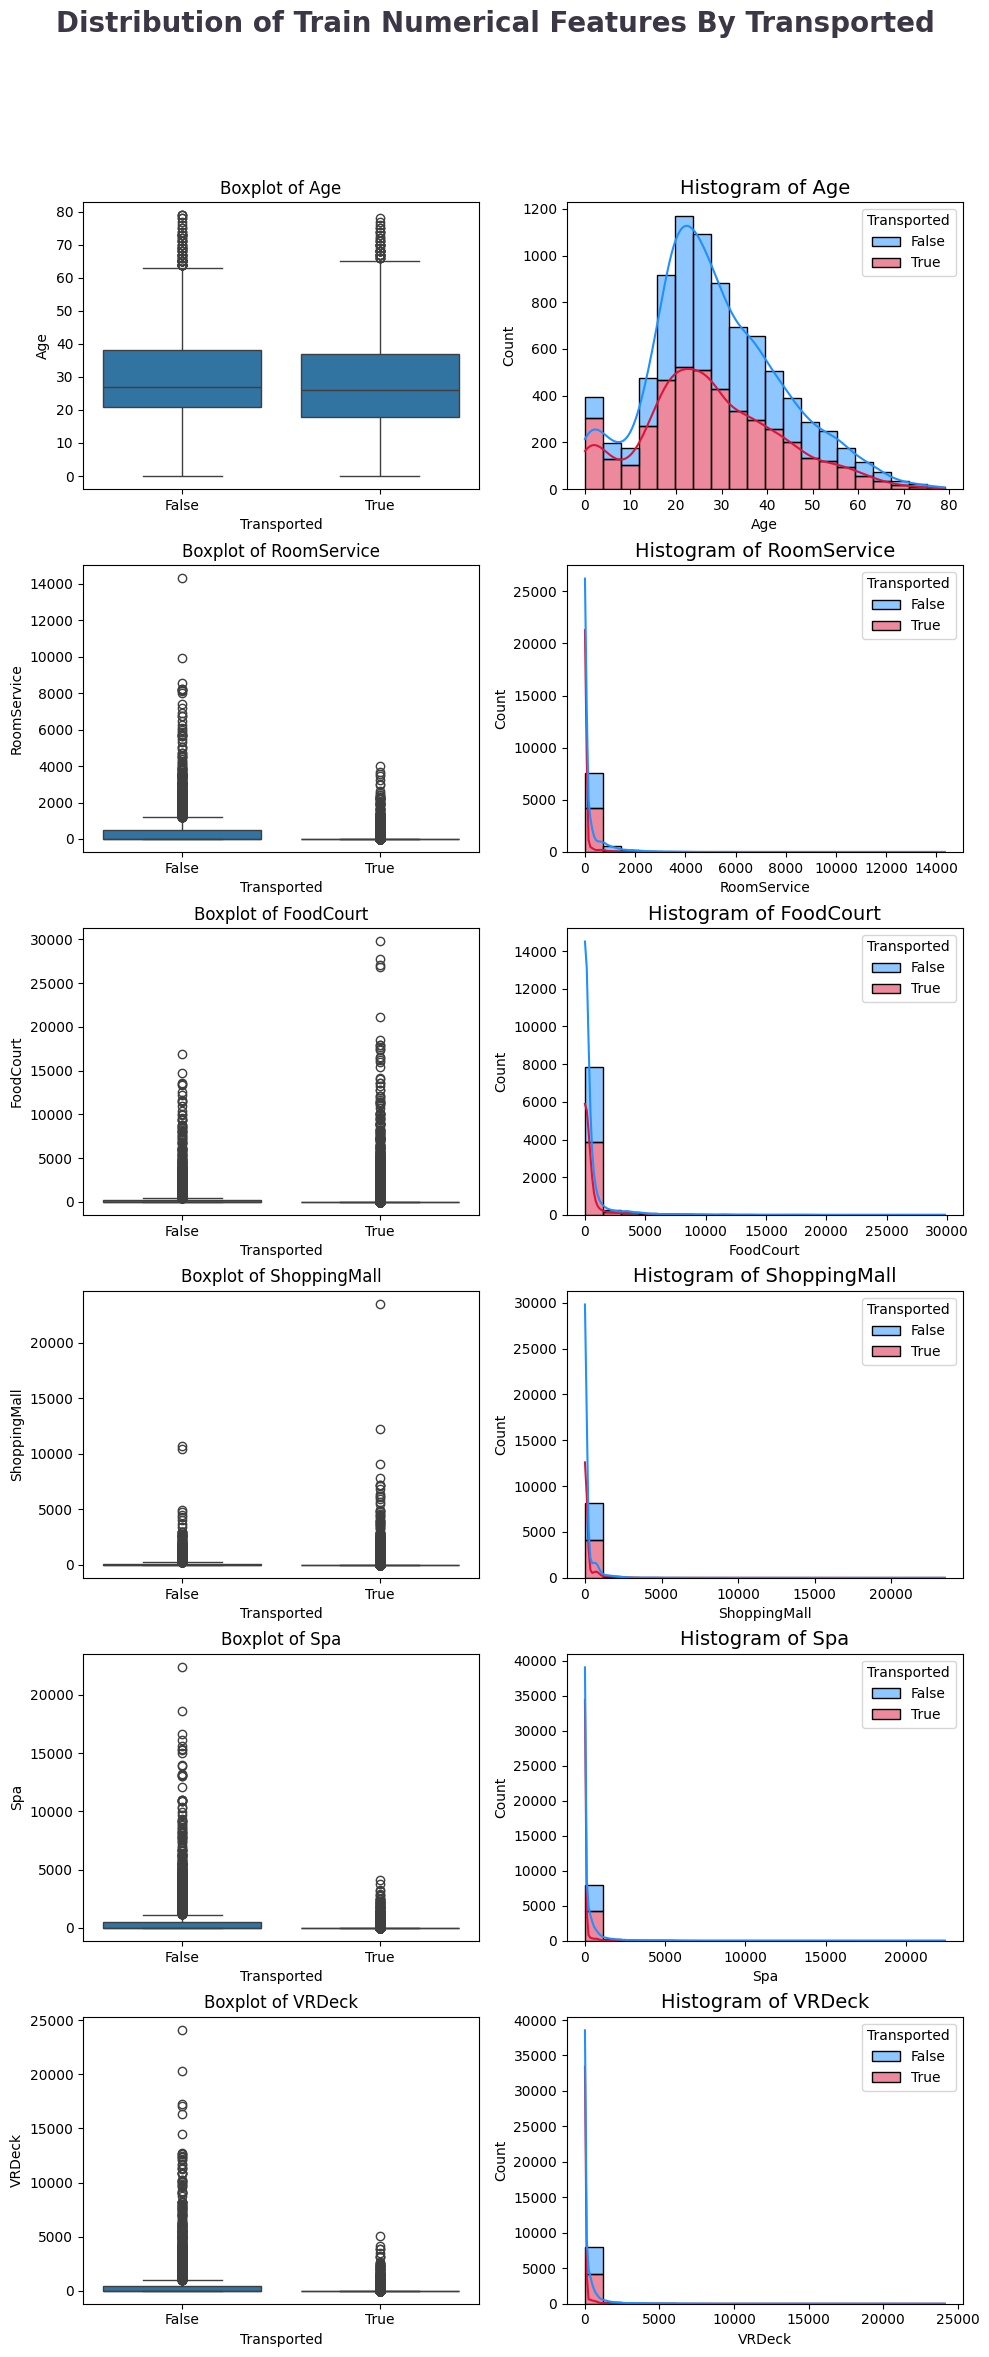

In [426]:
clr1 = ['#1E90FF', '#DC143C']  # Blue, Crimson, ForestGreen  # Add more colors if needed after checking unique values
train_num_features = len(train_continues_features)

fig, ax = plt.subplots(train_num_features, 2, figsize=(10, 4*train_num_features))
fig.suptitle('Distribution of Train Numerical Features By Transported', color='#3C3744',
             fontsize=20, fontweight='bold', ha='center')

for i, col in enumerate(train_continues_features):   
    # Boxplot without palette since no hue
    sns.boxplot(data=train_df, x='Transported', y=col, ax=ax[i,0])
    ax[i,0].set_title(f'Boxplot of {col}', fontsize=12)

    # Histogram with hue and palette
    sns.histplot(data=train_df, x=col, hue='Transported', bins=20, kde=True, 
                 multiple='stack', palette=clr1, ax=ax[i,1])
    ax[i,1].set_title(f'Histogram of {col}', fontsize=14)

fig.tight_layout()
fig.subplots_adjust(top=0.90)


**Report:**

**Key Takeaways**
- `Age`: Transported group skews younger.
- `Expenses (RoomService, FoodCourt, Spa, etc.)`: Highly skewed with many low values and few large outliers.
- `VRDeck & Spa`: Slightly higher usage among transported passengers.

**Observations**
- Data is `right-skewed` with `outlier`.
- Behavioral features may influence `Transported`.

**Next Moves**
- Try log transforms.
- Run a quick feature importance check.


---
## 4) Data Visualization

#### 4.1 Visualize Target Feature

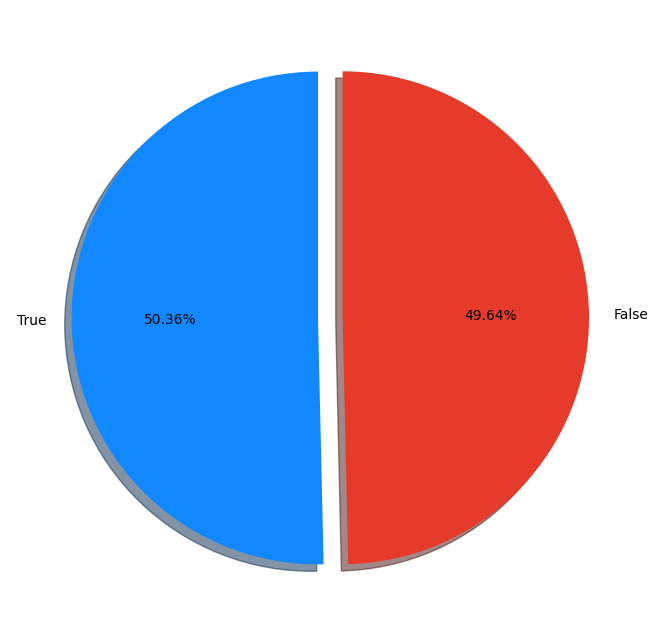

In [427]:
# Get percentage and corresponding labels dynamically
percentage = train_df.Transported.value_counts(normalize=True) * 100
labels = percentage.index.astype(str).tolist()  # Convert index to list of strings

# Adjust explode and colors accordingly
explode = [0.1 if label == "False" else 0 for label in labels]
colors = ['#1188ff', '#e63a2a'][:len(labels)]

# Plot PieChart with Matplotlib
fig, ax = plt.subplots(figsize=(15, 8))
ax.pie(percentage, labels=labels, startangle=90,
       autopct='%1.2f%%', explode=explode, shadow=True, colors=colors)
plt.show()

**Report:** 

- From the chart it is seen that the Target Variable is balanced

#### 4.2 Does HomePlanet have any impact on being Transported?

In [428]:
train_df.groupby('HomePlanet')['Transported'].value_counts(normalize=True).to_frame()*100

proportion
HomePlanet Transported            
Earth      False         57.605389
           True          42.394611
Europa     True          65.884561
           False         34.115439
Mars       True          52.302445
           False         47.697555
nan        True          51.243781
           False         48.756219

In [429]:
print(train_df['HomePlanet'].unique())


['Europa' 'Earth' 'Mars' 'nan']


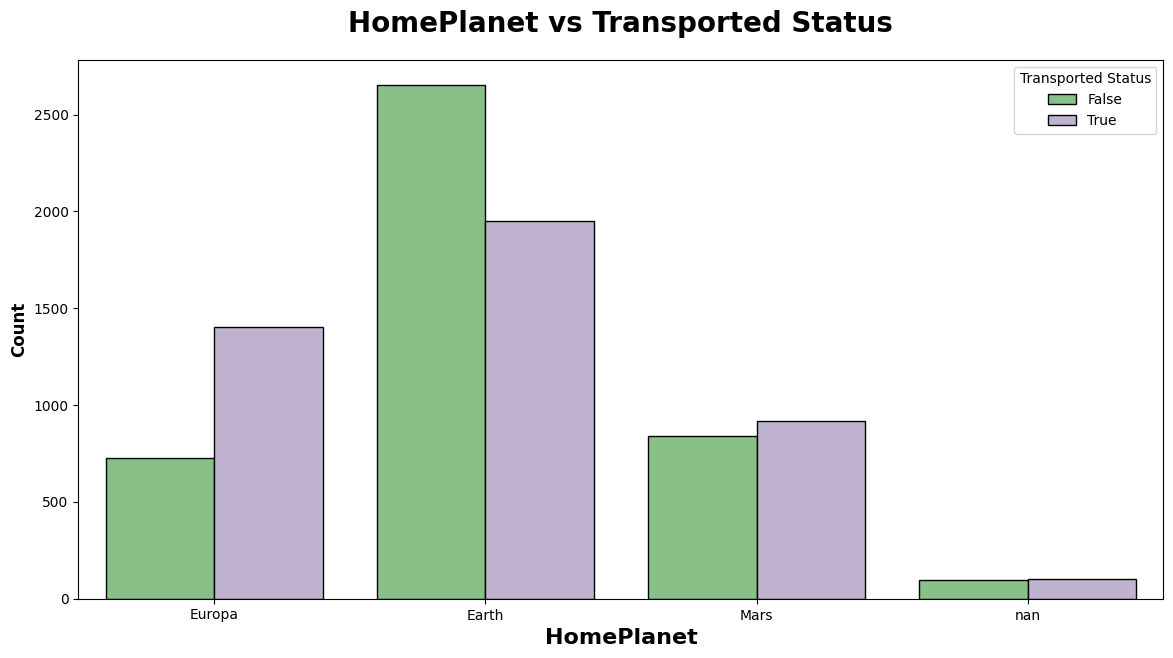

In [430]:
plt.subplots(figsize=(14,7))
sns.countplot(x="HomePlanet",hue="Transported", data=train_df, ec = "black",palette="Accent")
plt.title("HomePlanet vs Transported Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("HomePlanet", weight="bold", fontsize=16)
plt.legend(title="Transported Status", fancybox=True)
plt.show()

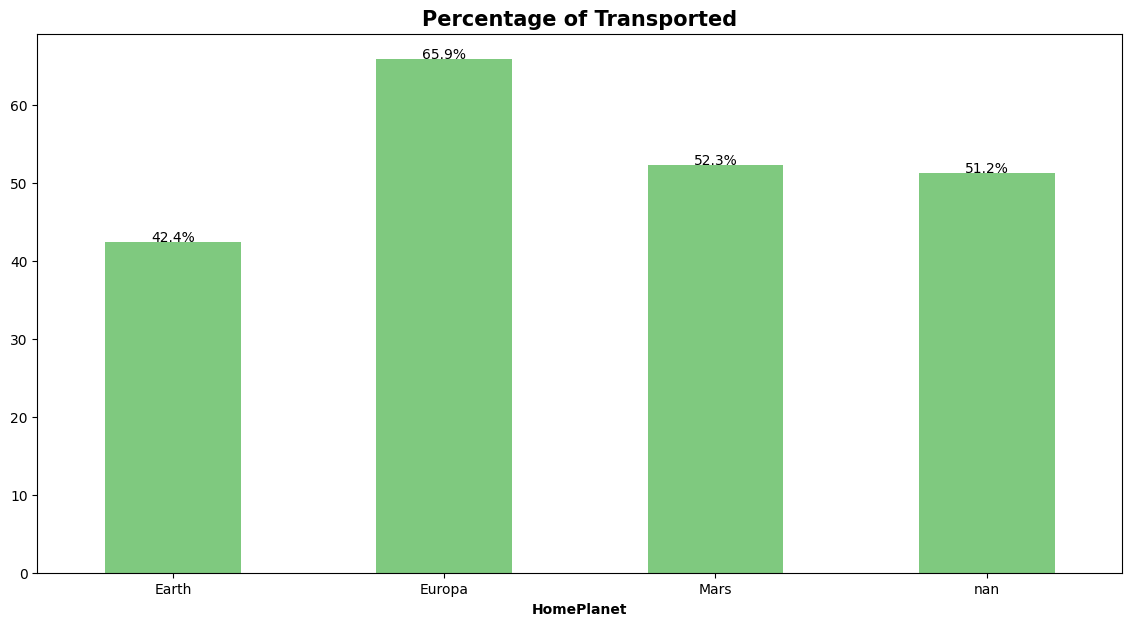

In [431]:
df2 = train_df.copy()
plt.figure(figsize=[14,7])

(100*df2[df2["Transported"].isin(['True'])]['HomePlanet'].value_counts()/df2['HomePlanet'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Transported" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["Transported"].isin(['True'])]['HomePlanet'].value_counts()/df2['HomePlanet'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('HomePlanet' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

**Report:**

- Passengers from Europa have the highest transport rate, more than 7 out of 10 are transported.
- Mars shows an almost even split with roughly half of its passengers transported.
- Earth has the lowest rate, with fewer than half of its passengers transported.
- Homeplanet plays a significant role: origin from Europa greatly increases transport likelihood, while Earth origin corresponds to the lowest chance.

#### 4.3 Does CryoSleep Status have any impact on being Transported?

In [432]:
train_df.groupby('CryoSleep')['Transported'].value_counts(normalize=True).to_frame()*100

proportion
CryoSleep Transported            
False     False         67.107924
          True          32.892076
True      True          81.758314
          False         18.241686
nan       False         51.152074
          True          48.847926

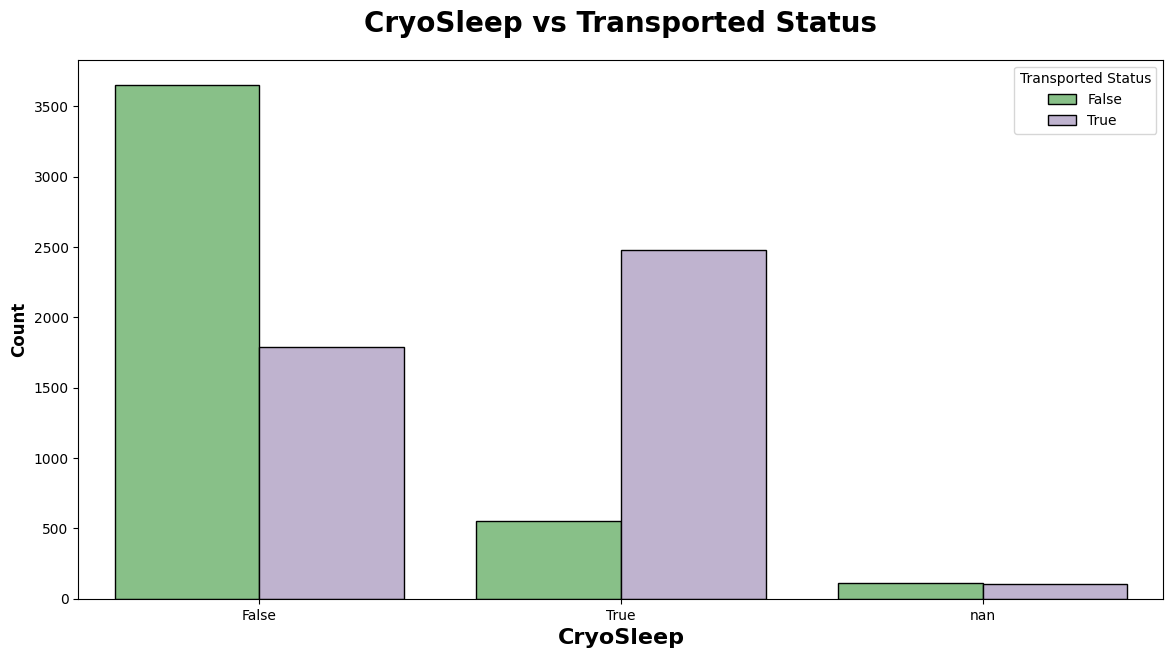

In [433]:
plt.subplots(figsize=(14,7))
sns.countplot(x="CryoSleep",hue="Transported", data=train_df, ec = "black",palette="Accent")
plt.title("CryoSleep vs Transported Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("CryoSleep", weight="bold", fontsize=16)
plt.legend(title="Transported Status", fancybox=True)
plt.show()

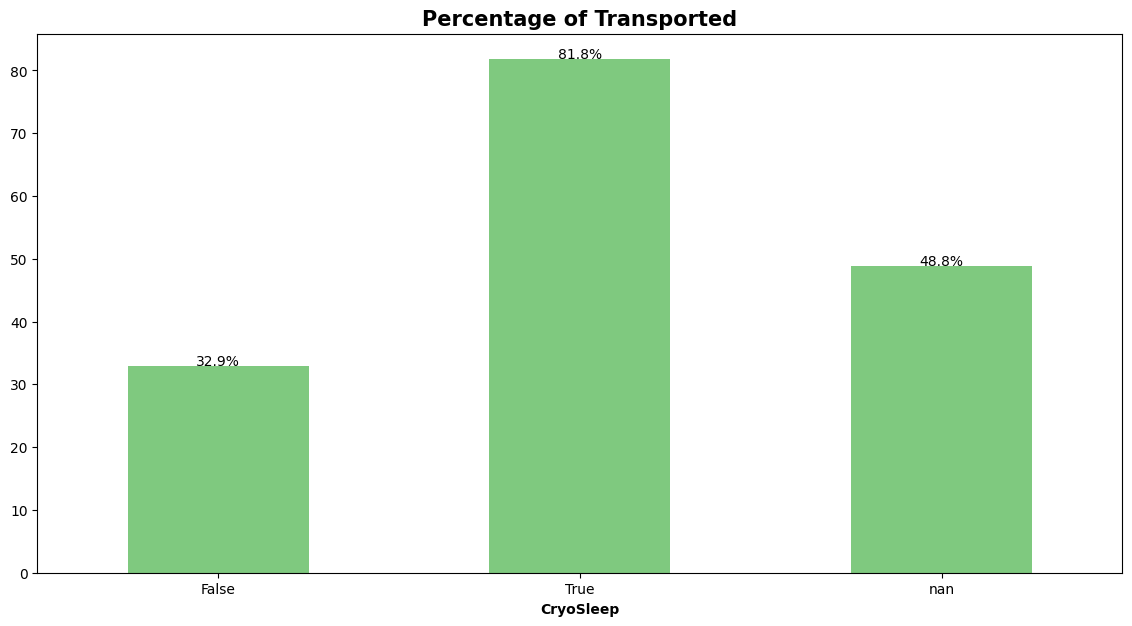

In [434]:
df2 = train_df.copy()
plt.figure(figsize=[14,7])

(100*df2[df2["Transported"].isin(['True'])]['CryoSleep'].value_counts()/df2['CryoSleep'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Transported" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["Transported"].isin(['True'])]['CryoSleep'].value_counts()/df2['CryoSleep'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('CryoSleep' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

**Report:**

- Passengers in CryoSleep (True) have the highest transport rate at 83%.
- Those not in CryoSleep (False) show a lower transport rate of 30%.
- Missing CryoSleep data (nan) aligns closer to non-cryosleep passengers, with a 40% transport rate.
- CryoSleep status significantly impacts transportation likelihood. Being in CryoSleep corresponds to a substantially higher chance of transport. 


#### 4.4 Does the destination influence the likelihood of being transported?

In [435]:
train_df.groupby('Destination')['Transported'].value_counts(normalize=True).to_frame()*100

proportion
Destination   Transported            
55 Cancri e   True          61.000000
              False         39.000000
PSO J318.5-22 True          50.376884
              False         49.623116
TRAPPIST-1e   False         52.882502
              True          47.117498
nan           True          50.549451
              False         49.450549

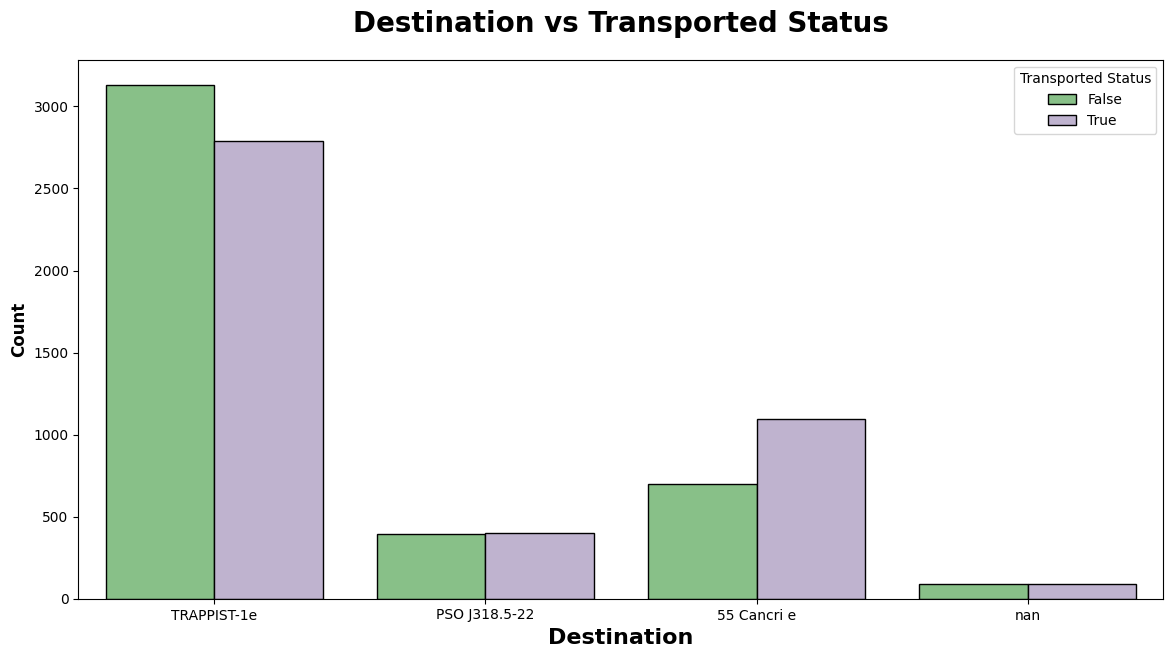

In [436]:
plt.subplots(figsize=(14,7))
sns.countplot(x="Destination",hue="Transported", data=train_df, ec = "black",palette="Accent")
plt.title("Destination vs Transported Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Destination", weight="bold", fontsize=16)
plt.legend(title="Transported Status", fancybox=True)
plt.show()

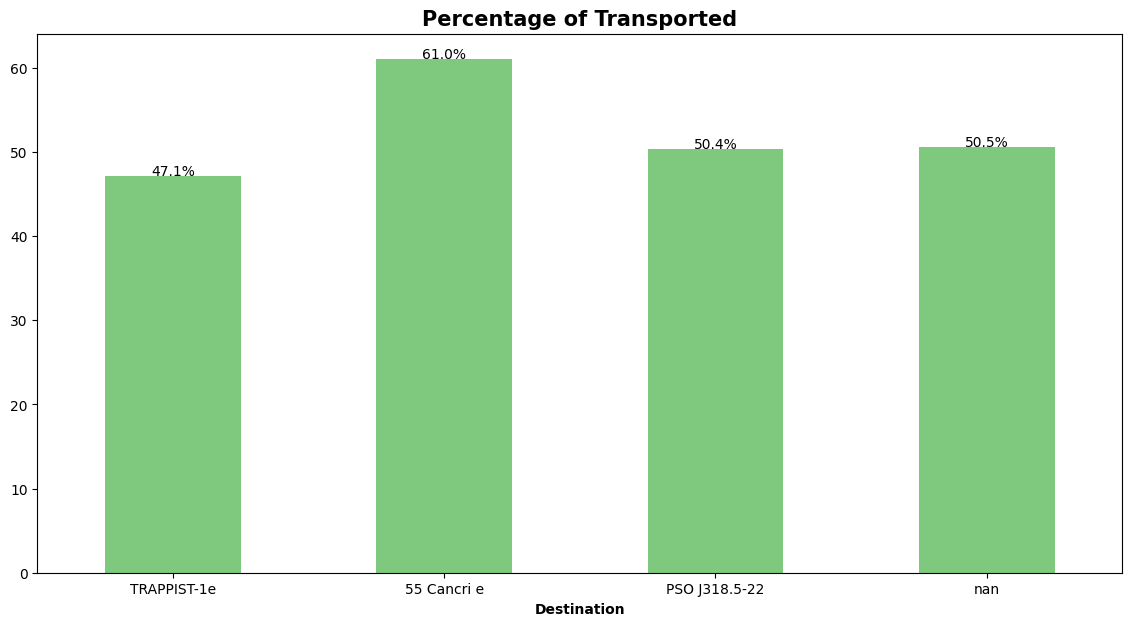

In [437]:
df2 = train_df.copy()
plt.figure(figsize=[14,7])

(100*df2[df2["Transported"].isin(['True'])]['Destination'].value_counts()/df2['Destination'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Transported" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["Transported"].isin(['True'])]['Destination'].value_counts()/df2['Destination'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('Destination' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

**Report:**

- TRAPPIST-1e has the largest cohort, with transported and non-transported counts nearly even.
- PSO J318.5-22 and 55 Cancri e both show a slight majority of transported passengers.
- The missing (nan) group is small but exhibits a high transport rate, likely due to sample size effects
- Destination exerts a modest influence on transport likelihood. Major destinations tend toward an even split, while smaller or unspecified groups can skew the observed rates

#### 4.5 Does VIP status influence transportation outcomes

In [438]:
train_df.groupby('VIP')['Transported'].value_counts(normalize=True).to_frame()*100

proportion
VIP   Transported            
False True          50.633217
      False         49.366783
True  False         61.809045
      True          38.190955
nan   True          51.231527
      False         48.768473

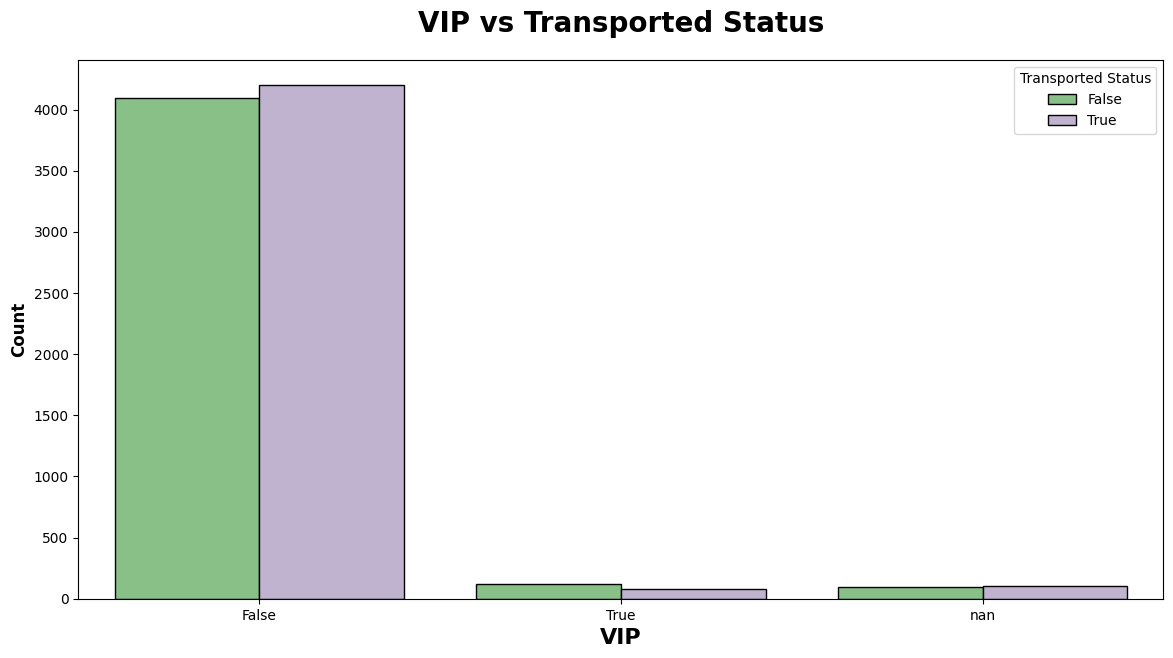

In [439]:
plt.subplots(figsize=(14,7))
sns.countplot(x="VIP",hue="Transported", data=train_df, ec = "black",palette="Accent")
plt.title("VIP vs Transported Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("VIP", weight="bold", fontsize=16)
plt.legend(title="Transported Status", fancybox=True)
plt.show()

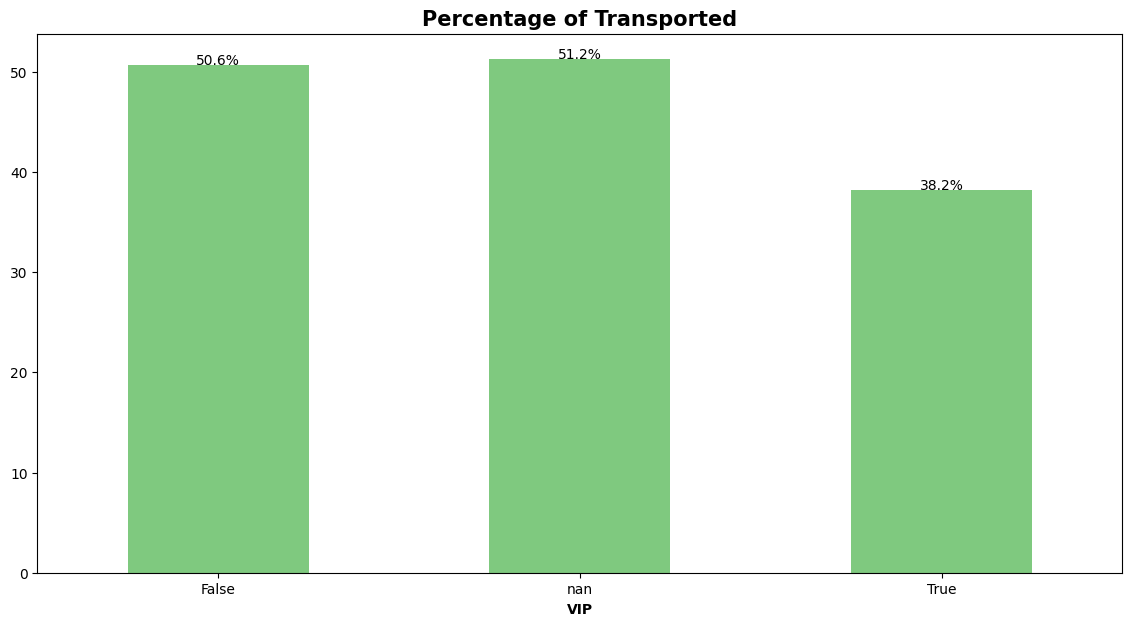

In [440]:
df2 = train_df.copy()
plt.figure(figsize=[14,7])

(100*df2[df2["Transported"].isin(['True'])]['VIP'].value_counts()/df2['VIP'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Transported" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["Transported"].isin(['True'])]['VIP'].value_counts()/df2['VIP'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('VIP' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

**Report:**

- Non-VIP passengers make up the vast majority of the cohort, with transportation split roughly evenly.
- VIP passengers exhibit a higher transport rate (around 60%), though they represent a very small subset.
- The missing-status group is tiny and shows a lower transport rate (around 33%), but sample size limits reliability.
- VIP status appears to modestly increase the likelihood of being transported, but the effect is based on a small VIP population. Non-VIPs hover around a 50/50 chance, while missing data are too sparse for firm conclusions


---
## 5) Final Report

- **Drop columns:** `PassengerId`, `Cabin`, `Name` are mostly unique IDs with little predictive value.
- **Important categorical features:** `VIP`, `CryoSleep` (majority not VIP and not in cryosleep).
- **Travel patterns:** Most passengers from `Earth`, heading to `TRAPPIST-1e`.
- **Cabin:** Should be split into `deck`, `number`, and `side` for better features.

**Numerical features:**

- `Age`  normal distribution (young adults dominant).
- `RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, `VRDeck` are right-skewed with many zeros and some outliers consider log transform.

**Categorical insights:**

- `HomePlanet` and `CryoSleep` strongly linked to transport outcome.
- `VIP` status rare but shows slightly higher transport rate.
- `Transported` target is balanced (≈50/50).

**Statistical tests:**

- `Chi-square` rejects null for all key categorical features vs target significant associations.
- `Low multicollinearity` among numerical variables (VIF ≈ 1).

**Target insights:**

- Passengers from `Europa` and those in `CryoSleep` have higher transport rates.
- `Earth` origin passengers have lowest transport likelihood.
- **Missing data:** Around 2% missing across features `imputation` needed.

---
**Feature Engineering and Model Training in Next ipynb**